# Import Libraries

In [54]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFECV, SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# Data Loading

In [56]:
# Load the dataset
data = pd.read_csv('Environmental_Classification_Dataset.csv')


# Exploratory Data Analysis And Data Preprocessing

In [419]:
data.shape

(1500, 12)

In [420]:
data.head()  

,Temperature,Humidity,WindSpeed,Rainfall,AirQualityIndex,SoilMoisture,WaterLevel,NoiseLevel,GreenCoverIndex,RiskCategory,Region,WeatherCondition
0,23.1,61.5,26.9,179.8,224.0,8.9,34.2,76.0,12.0,1,South,Sunny
1,43.3,58.3,31.9,NaN,0.0,35.5,10.8,50.3,15.0,1,South,Cloudy
2,35.6,22.1,10.0,86.5,306.0,27.3,7.0,40.5,43.0,1,South,Rainy
3,31.0,47.3,25.0,1.9,260.0,10.8,58.9,55.3,70.0,1,South,Rainy
4,15.5,50.4,22.9,148.9,12.0,20.0,52.1,77.6,26.0,0,Central,Rainy


In [421]:
data.tail()

,Temperature,Humidity,WindSpeed,Rainfall,AirQualityIndex,SoilMoisture,WaterLevel,NoiseLevel,GreenCoverIndex,RiskCategory,Region,WeatherCondition
1495,33.4,89.2,24.4,205.3,244.0,5.5,21.5,83.7,46.0,1,North,Rainy
1496,31.7,32.6,19.5,151.0,334.0,28.0,63.4,NaN,89.0,1,Central,Cloudy
1497,26.2,44.8,5.3,NaN,7.0,17.8,76.1,42.3,0.0,0,South,Sunny
1498,23.3,43.2,10.5,145.6,153.0,26.4,98.6,86.0,93.0,0,North,Rainy
1499,40.2,89.7,16.8,44.8,35.0,29.4,18.0,45.9,56.0,1,Central,Cloudy


In [422]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature       1424 non-null   float64
 1   Humidity          1421 non-null   float64
 2   WindSpeed         1423 non-null   float64
 3   Rainfall          1415 non-null   float64
 4   AirQualityIndex   1421 non-null   float64
 5   SoilMoisture      1399 non-null   float64
 6   WaterLevel        1435 non-null   float64
 7   NoiseLevel        1405 non-null   float64
 8   GreenCoverIndex   1423 non-null   float64
 9   RiskCategory      1500 non-null   int64  
 10  Region            1500 non-null   object 
 11  WeatherCondition  1500 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 140.8+ KB


In [38]:
#  Check for Missing Values
data.isnull().sum()

Temperature          76
Humidity             79
WindSpeed            77
Rainfall             85
AirQualityIndex      79
SoilMoisture        101
WaterLevel           65
NoiseLevel           95
GreenCoverIndex      77
RiskCategory          0
Region                0
WeatherCondition      0
dtype: int64

In [432]:
data.describe()

,Temperature,Humidity,WindSpeed,Rainfall,AirQualityIndex,SoilMoisture,WaterLevel,NoiseLevel,GreenCoverIndex,RiskCategory
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,27.463343,60.312456,19.669009,150.746431,253.064743,21.908792,48.969268,60.643060,47.829234,0.724667
std,10.025971,22.471146,11.092397,84.199465,136.642690,9.670630,27.430181,16.610664,28.168552,0.446831
min,10.200000,20.000000,0.000000,0.100000,0.000000,5.000000,0.000000,30.000000,0.000000,0.000000
25%,18.675000,42.100000,10.375000,80.675000,140.750000,13.800000,26.475000,47.100000,24.000000,0.000000
50%,27.463343,60.312456,19.669009,150.746431,253.064743,21.908792,48.969268,60.643060,47.829234,1.000000
75%,35.800000,79.425000,28.400000,221.250000,365.250000,29.600000,71.700000,74.550000,71.000000,1.000000
max,45.000000,99.900000,40.000000,299.800000,499.000000,40.000000,99.900000,90.000000,99.000000,1.000000


In [18]:
#  Define Target Variable
target_column = 'RiskCategory'
X = data.drop(columns=[target_column])
y = data[target_column]

data['RiskCategory'].value_counts()

RiskCategory
1    1087
0     413
Name: count, dtype: int64

C:\Users\kuwar\AppData\Local\Temp\ipykernel_13364\3764612359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RiskCategory', data=data, palette='viridis')


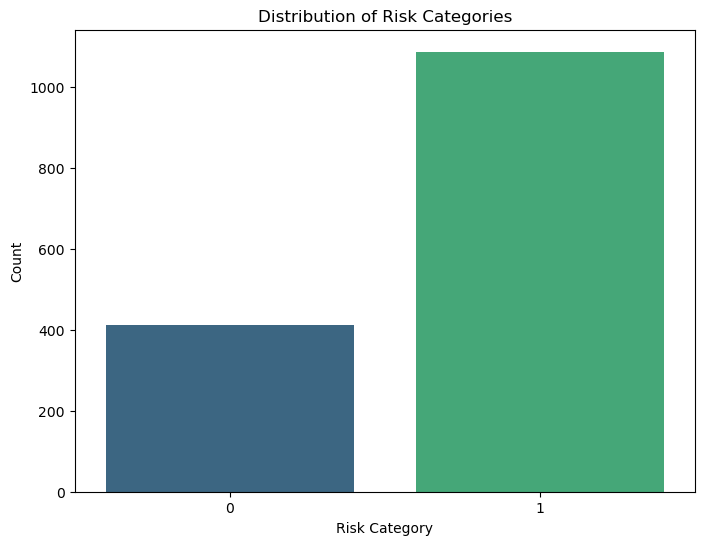

In [42]:
# Plot the distribution of the target variable 'RiskCategory'
plt.figure(figsize=(8, 6))
sns.countplot(x='RiskCategory', data=data, palette='viridis')
plt.title("Distribution of Risk Categories")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()

C:\Users\kuwar\AppData\Local\Temp\ipykernel_23500\3064555263.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['RiskCategory'] == 1]['AirQualityIndex'], label='High Risk', shade=True, color='red')
C:\Users\kuwar\AppData\Local\Temp\ipykernel_23500\3064555263.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['RiskCategory'] == 0]['AirQualityIndex'], label='Low Risk', shade=True, color='blue')


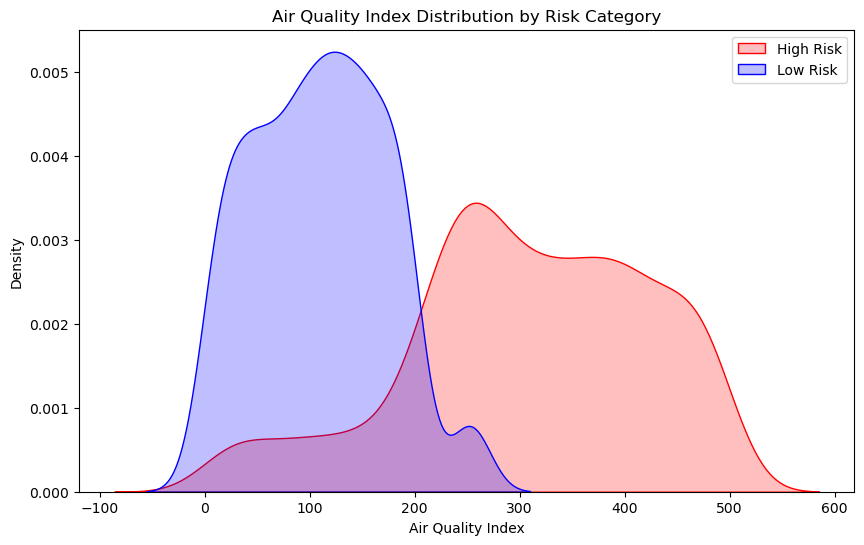

In [435]:
# Air Quality Index Distribution by Risk Category
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['RiskCategory'] == 1]['AirQualityIndex'], label='High Risk', shade=True, color='red')
sns.kdeplot(data[data['RiskCategory'] == 0]['AirQualityIndex'], label='Low Risk', shade=True, color='blue')
plt.title('Air Quality Index Distribution by Risk Category')
plt.xlabel('Air Quality Index')
plt.ylabel('Density')
plt.legend()
plt.show()

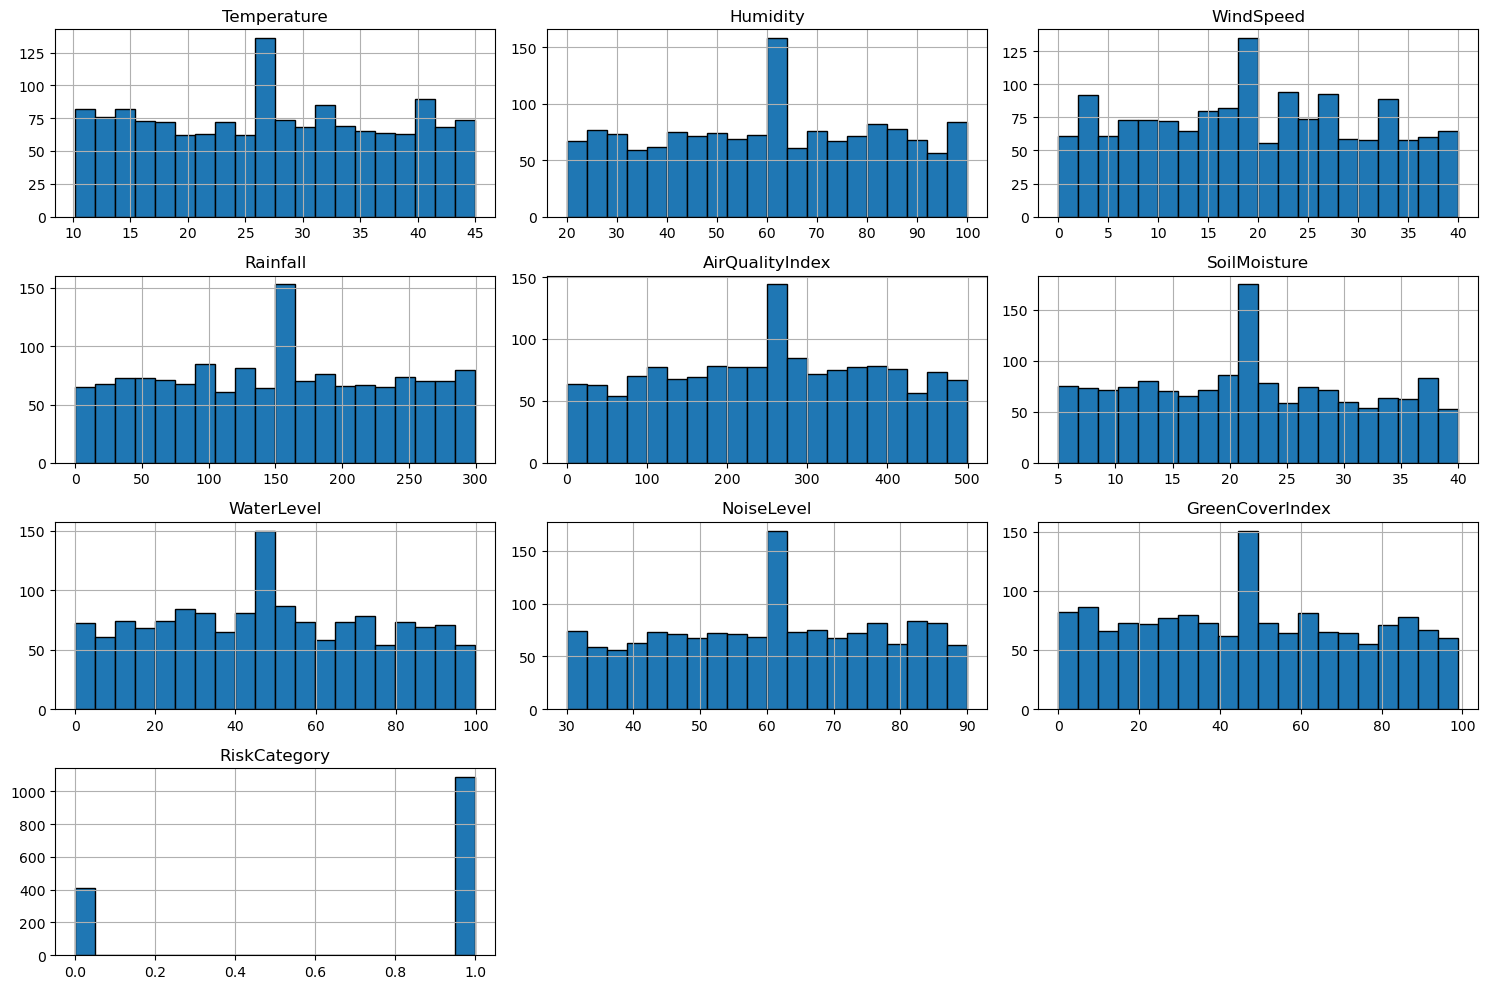

In [436]:
#  Plot Histogram for Each Feature
data.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

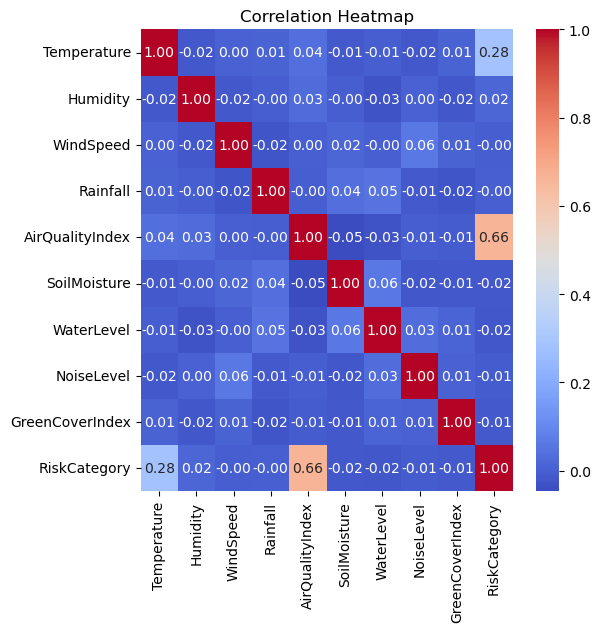

In [48]:
#  Plot Correlation Heatmap
# Select only numeric columns for correlation matrix calculation
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


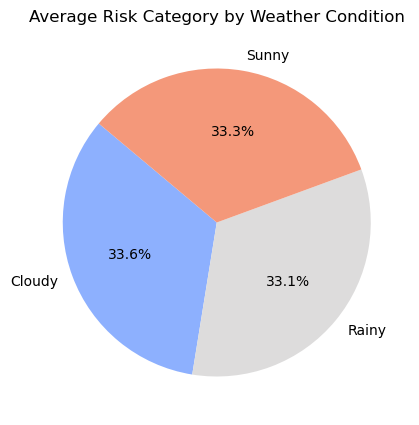

In [50]:
# Average Risk Category by Weather Condition

weather_risk_avg = data.groupby('WeatherCondition')['RiskCategory'].mean()

plt.figure(figsize=(8, 5))
colors = sns.color_palette('coolwarm', len(weather_risk_avg))
plt.pie(weather_risk_avg, labels=weather_risk_avg.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Average Risk Category by Weather Condition')
plt.show()


In [62]:
#  Handle/Fill Missing Values by Mean Method using fillna
# Fill only the numeric columns with their respective mean values
data.fillna(data.select_dtypes(include=[np.number]).mean(), inplace=True)

In [64]:
#  Check for any remaining null values
data.isnull().sum()

Temperature         0
Humidity            0
WindSpeed           0
Rainfall            0
AirQualityIndex     0
SoilMoisture        0
WaterLevel          0
NoiseLevel          0
GreenCoverIndex     0
RiskCategory        0
Region              0
WeatherCondition    0
dtype: int64

In [66]:
#  Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [68]:
#  Check Class Balancing in the Target Variable
class_balance = y_train.value_counts(normalize=True)

In [70]:
#  Encode Categorical Variables
X_train_encoded = pd.get_dummies(X_train, columns=['Region', 'WeatherCondition'])
X_test_encoded = pd.get_dummies(X_test, columns=['Region', 'WeatherCondition'])


In [72]:
#  Ensuring both train and test sets have the same columns after encoding
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

In [74]:
#  Standardize the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=[np.number]))  # Only numerical columns
X_test_scaled = scaler.transform(X_test.select_dtypes(include=[np.number]))


In [76]:
#  Normalize Data
normalizer = Normalizer()
X_train_normalized = normalizer.fit_transform(X_train_encoded.select_dtypes(include=[np.number]))
X_test_normalized = normalizer.transform(X_test_encoded.select_dtypes(include=[np.number]))


# Feature Selection

# 1) Select KBest

In [78]:
#   Apply Feature selection methods

# 1) : Apply SelectKBest to select top k features
k_best = SelectKBest(score_func=f_classif, k=9)  # Choose 'k' based on your needs
X_train_kbest = k_best.fit_transform(X_train_normalized, y_train)
X_test_kbest = k_best.transform(X_test_normalized)



# 2) RFECV

In [80]:
# Step 15
#  2) : Feature Selection with RFECV

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

model_for_rfecv = LogisticRegression(max_iter=1000)
rfecv = RFECV(estimator=model_for_rfecv, step=5, cv=StratifiedKFold(3), scoring='accuracy')
rfecv.fit(X_train_normalized, y_train)

RFECV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
      estimator=LogisticRegression(max_iter=1000), scoring='accuracy', step=5)

In [82]:
#  Train Select best features
X_train_selected = rfecv.transform(X_train_normalized)
X_test_selected = rfecv.transform(X_test_normalized)


#  Classification Algorithms 

# a) Random Forest Classifier

In [84]:
#  Apply Classification Algorithms 

# a) Random_Forest_Classifier

#  Train models
rf_classifier = RandomForestClassifier(random_state=42)

# Training on the selected features
rf_classifier.fit(X_train_selected, y_train)

#  Predict on Test Set with Trained Models
rf_predictions = rf_classifier.predict(X_test_selected)

#  Evaluate Model Performance
rf_classification_report = classification_report(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)


In [448]:
# Print classification reports
print("Random Forest Classification Report with SelectKBest + RFECV:\n", rf_classification_report)


Random Forest Classification Report with SelectKBest + RFECV:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       123
           1       0.92      0.94      0.93       327

    accuracy                           0.90       450
   macro avg       0.87      0.86      0.87       450
weighted avg       0.89      0.90      0.89       450



Text(95.72222222222221, 0.5, 'True Label')

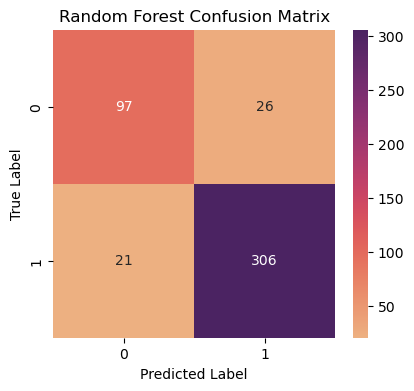

In [118]:
# Plotting Confusion Matrices
plt.figure(figsize=(10, 4))

# Random Forest Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d", cmap="flare")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")


# b) Decision Tree Classifier

In [96]:
# b)  Decision Tree Classifier
#Train the model
dt_classifier = DecisionTreeClassifier(random_state=42)

#Training on the selected features
dt_classifier.fit(X_train_selected, y_train)

# Predict on Test Set with Trained Models
dt_predictions = dt_classifier.predict(X_test_selected)

# Evaluate model performance
dt_classification_report = classification_report(y_test, dt_predictions)
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)

# print classification report
print("Decision Tree Classification Report with SelectKBest + RFECV:\n", dt_classification_report)

Decision Tree Classification Report with SelectKBest + RFECV:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75       123
           1       0.91      0.88      0.90       327

    accuracy                           0.86       450
   macro avg       0.82      0.83      0.82       450
weighted avg       0.86      0.86      0.86       450



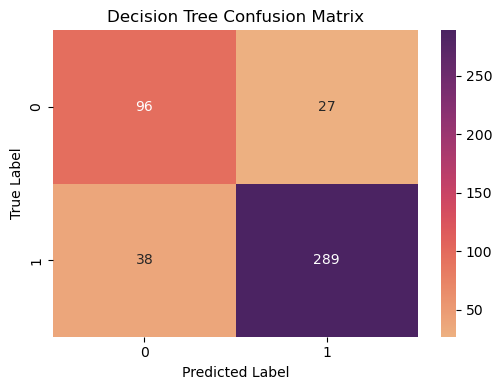

In [116]:
# Decision Tree Confusion Matrix
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 2)
sns.heatmap(dt_confusion_matrix, annot=True, fmt="d", cmap="flare")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()

#    Model Comparisons

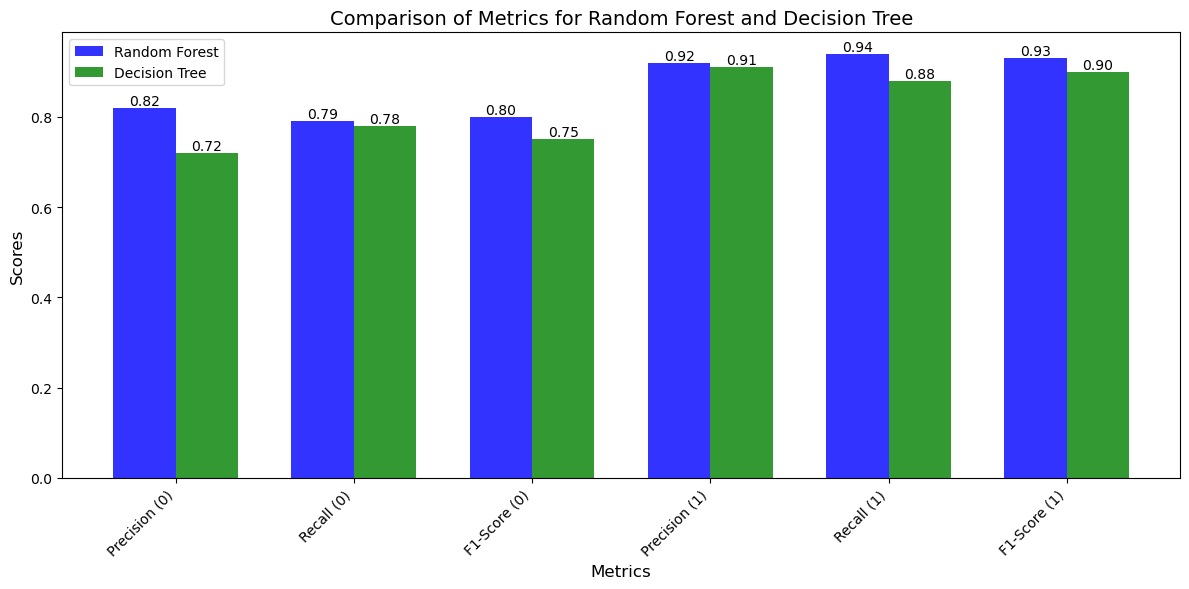

In [453]:

# Metrics extracted from the classification reports
rf_metrics = {
    "Precision (0)": 0.82,
    "Recall (0)": 0.79,
    "F1-Score (0)": 0.80,
     "Precision (1)": 0.92,
    "Recall (1)": 0.94,
    "F1-Score (1)": 0.93,
     
}

dt_metrics = {
    "Precision (0)": 0.72,
    "Recall (0)": 0.78,
    "F1-Score (0)": 0.75,
    "Precision (1)": 0.91,
    "Recall (1)": 0.88,
    "F1-Score (1)": 0.90,
   
}

# Extracting the metrics and preparing for plotting
metrics = list(rf_metrics.keys())
rf_values = list(rf_metrics.values())
dt_values = list(dt_metrics.values())

x = np.arange(len(metrics))
width = 0.35

# Creating the grouped bar plot
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, rf_values, width, label='Random Forest', color='blue', alpha=0.8)
plt.bar(x + width/2, dt_values, width, label='Decision Tree', color='green', alpha=0.8)

# Adding labels, title, and legend
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.title("Comparison of Metrics for Random Forest and Decision Tree", fontsize=14)
plt.xticks(x, metrics, rotation=45, ha='right')
plt.legend()

# Annotating the bars with values
for i in range(len(metrics)):
    plt.text(x[i] - width/2, rf_values[i], f'{rf_values[i]:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(x[i] + width/2, dt_values[i], f'{dt_values[i]:.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


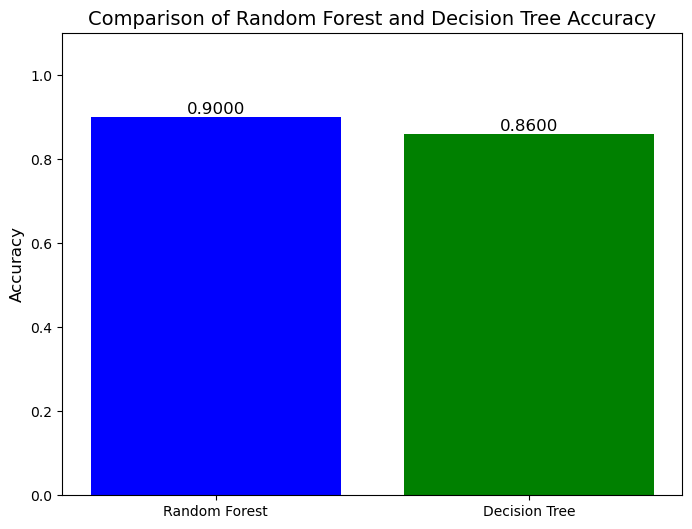

In [452]:
#    Model Comparisons
rf_accuracy = 0.90  #  accuracy of the Random Forest model
dt_accuracy = 0.86  # accuracy of the Decision Tree model

# Models and their corresponding accuracies
models = ['Random Forest', 'Decision Tree']
accuracies = [rf_accuracy, dt_accuracy]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green'])

# Add accuracy values on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.4f}', ha='center', va='bottom', fontsize=12)

# Add titles and labels
plt.title('Comparison of Random Forest and Decision Tree Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.1)  # Ensure the y-axis range is appropriate for accuracy

# Display the plot
plt.show()
